In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving indeed_job_dataset.csv to indeed_job_dataset.csv


In [167]:
from google.colab import files
uploaded = files.upload()

Saving indeed_CA.csv to indeed_CA.csv


In [6]:
import io
indeed_data = pd.read_csv(io.BytesIO(uploaded['indeed_job_dataset.csv']))

In [168]:
import io
indeed_ca = pd.read_csv(io.BytesIO(uploaded['indeed_CA.csv']))

In [162]:
indeed_data.head(2)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Description,Location,Company_Revenue,Company_Employees,Company_Industry,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,1.0,"[<p><b>POSITION SUMMARY</b></p>, <p>\r\r\nThe ...",MO,More than $10B (USD),"10,000+",Health Care,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,15.0,"[<p><b>What do we need?</b></p>, <ul><li>\r\r\...",TX,NaN,NaN,NaN,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [164]:
groupedby_jobtype = indeed_data.groupby('Job_Type').agg({'python': 'sum','sql': 'sum','machine learning':'sum','r':'sum','hadoop':'sum','tableau':'sum','sas':'sum','spark':'sum','Others':'sum'})
groupedby_jobtype = groupedby_jobtype.reset_index(level='Job_Type')
groupedby_jobtype

,Job_Type,python,sql,machine learning,r,hadoop,tableau,sas,spark,Others
0,data_analyst,512,1044,166,456,126,538,310,67,1462
1,data_engineer,901,867,289,228,761,214,67,719,1338
2,data_scientist,1912,1193,1842,1550,827,484,564,745,2352


In [165]:
groupedby_jobtype = groupedby_jobtype.set_index('Job_Type')
groupedby_jobtype = groupedby_jobtype.T
groupedby_jobtype = groupedby_jobtype.reset_index()

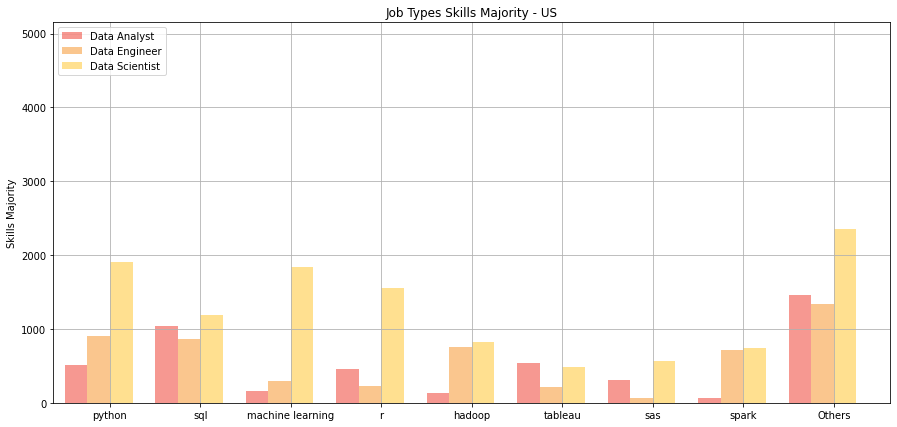

In [166]:
pos = list(range(len(groupedby_jobtype['data_analyst'])))
width = 0.25
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(pos, groupedby_jobtype['data_analyst'], width, alpha=0.5, color='#EE3224')
plt.bar([p + width for p in pos], groupedby_jobtype['data_engineer'], width, alpha=0.5, color='#F78F1E')
plt.bar([p + width*2 for p in pos], groupedby_jobtype['data_scientist'], width, alpha=0.5, color='#FFC222')

ax.set_ylabel('Skills Majority')
ax.set_title('Job Types Skills Majority - US')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(groupedby_jobtype['index'])

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(groupedby_jobtype['data_analyst'] + groupedby_jobtype['data_engineer'] + groupedby_jobtype['data_scientist'])] )

plt.legend(['Data Analyst', 'Data Engineer', 'Data Scientist'], loc='upper left')
plt.grid()
plt.show()

In [169]:
groupedby_CA = indeed_ca.groupby('Job_Type').agg({'python': 'sum','sql': 'sum','machine learning':'sum','r':'sum','hadoop':'sum','tableau':'sum','sas':'sum','spark':'sum','Others':'sum'})
groupedby_CA = groupedby_CA.reset_index(level='Job_Type')
groupedby_CA = groupedby_CA.set_index('Job_Type')
groupedby_CA = groupedby_CA.T
groupedby_CA = groupedby_CA.reset_index()

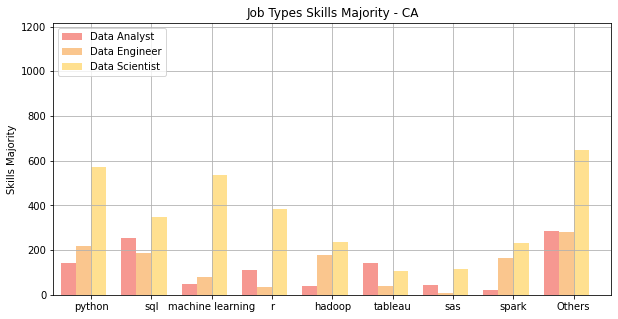

In [172]:
pos = list(range(len(groupedby_CA['data_analyst'])))
width = 0.25
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos, groupedby_CA['data_analyst'], width, alpha=0.5, color='#EE3224')
plt.bar([p + width for p in pos], groupedby_CA['data_engineer'], width, alpha=0.5, color='#F78F1E')
plt.bar([p + width*2 for p in pos], groupedby_CA['data_scientist'], width, alpha=0.5, color='#FFC222')

ax.set_ylabel('Skills Majority')
ax.set_title('Job Types Skills Majority - CA')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(groupedby_CA['index'])

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(groupedby_CA['data_analyst'] + groupedby_CA['data_engineer'] + groupedby_CA['data_scientist'])] )

plt.legend(['Data Analyst', 'Data Engineer', 'Data Scientist'], loc='upper left')
plt.grid()
plt.show()

In [199]:
analyst = indeed_data.loc[indeed_data['Job_Type'] == 'data_analyst']
analyst_posts = analyst.groupby(analyst['Date_Since_Posted']).count()
analyst_posts = analyst_posts.reset_index()
analyst_posts = analyst_posts[['Date_Since_Posted','Job_Title']]

In [205]:
engineer = indeed_data.loc[indeed_data['Job_Type'] == 'data_engineer']
engineer_posts = engineer.groupby(engineer['Date_Since_Posted']).count()
engineer_posts = engineer_posts.reset_index()
engineer_posts = engineer_posts[['Date_Since_Posted','Job_Title']]

In [206]:
scientist = indeed_data.loc[indeed_data['Job_Type'] == 'data_scientist']
scientist_posts = scientist.groupby(scientist['Date_Since_Posted']).count()
scientist_posts = scientist_posts.reset_index()
scientist_posts = scientist_posts[['Date_Since_Posted','Job_Title']]

In [208]:
last_30_days_job_posts = pd.DataFrame({'date_since_posted':analyst_posts['Date_Since_Posted'],'data_analyst':analyst_posts['Job_Title'],'data_engineer':engineer_posts['Job_Title'],
                                       'data_scientist':scientist_posts['Job_Title']})
last_30_days_job_posts.head(3)

,date_since_posted,data_analyst,data_engineer,data_scientist
0,1.0,101,59,106
1,2.0,31,19,20
2,3.0,6,8,13


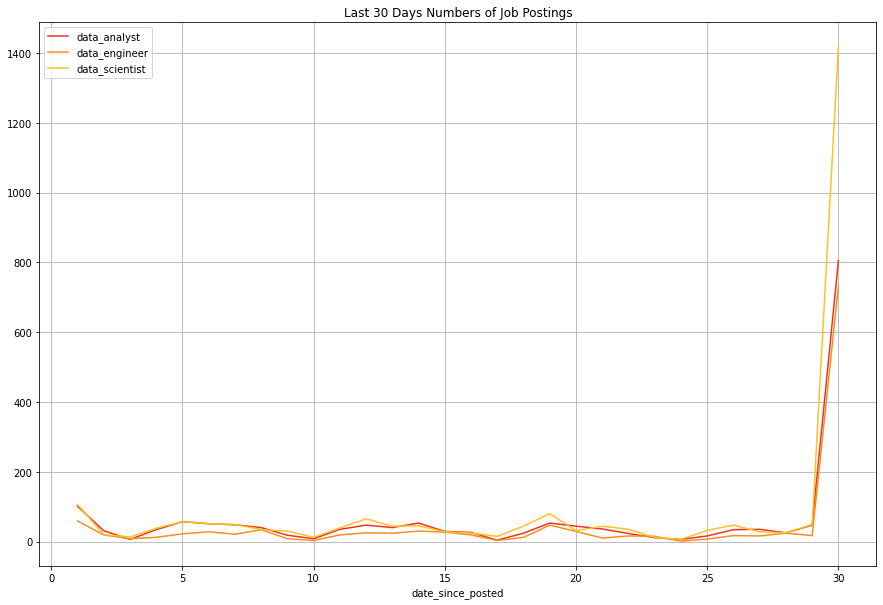

In [220]:
ax = plt.gca()

last_30_days_job_posts.plot(kind='line',x='date_since_posted',y='data_analyst', color='#EE3224',ax=ax)
last_30_days_job_posts.plot(kind='line',x='date_since_posted',y='data_engineer', color='#F78F1E', ax=ax, figsize=(15,10))
last_30_days_job_posts.plot(kind='line',x='date_since_posted',y='data_scientist', color='#FFC222', ax=ax, figsize=(15,10))
plt.title("Last 30 Days Numbers of Job Postings")
plt.grid()
plt.show()